# Probabilistic forecasting of the gold price using Monte Carlo method

## Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Get gold price df and set date as index
df_au = pd.read_csv("../data/AU.csv", index_col="date", parse_dates=True)

In [3]:
# Set charts theme
sns.set_theme(style="darkgrid", rc={"grid.alpha": 0.33})
plt.style.use("dark_background")

# Save chart as png function
def save_chart_as_png(filename: str) -> None:
    plt.savefig(
        f"../images/{filename}.png",
        format="png",
        dpi=300,
        orientation="landscape",
        bbox_inches="tight",
    )

## One year forecast

In [4]:
# Get daily price change
df_au["price_change"] = df_au["price"].pct_change()
# Get the mean and standard deviation of price changes
price_change_avg = df_au["price_change"].mean()
price_change_std = df_au["price_change"].std()

In [5]:
# Get simulation parameters
num_simulations = 10_000
num_days = 252
# Initialize df and pre-allocate for efficiency
df_mcs = pd.DataFrame(index=range(num_days + 1), columns=range(num_simulations))
# Get last price as starting point
last_price = df_au["price"].iloc[-1]
# Append last price to df
df_mcs.iloc[0, :] = last_price
# Generate random simulations
for simulation in range(num_simulations):
    # Generate random daily returns series
    daily_returns = np.random.normal(price_change_avg, price_change_std, num_days)
    # Get price series from daily returns series
    price_series = last_price * (1 + daily_returns).cumprod()
    # Append price series to df
    df_mcs.iloc[1:, simulation] = price_series

Text(0, 0.5, '')

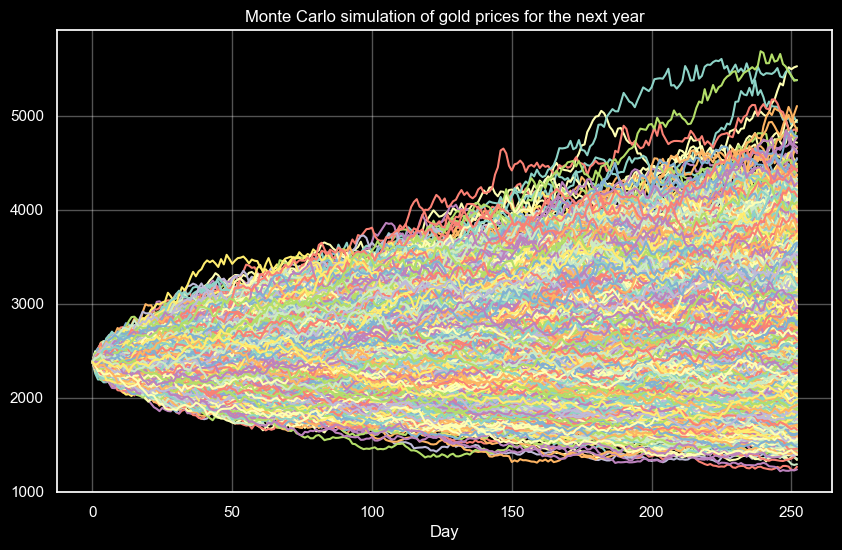

In [6]:
plt.figure(figsize=(10, 6))

plt.plot(df_mcs)

plt.title("Monte Carlo simulation of gold prices for the next year")
plt.xlabel("Day")
plt.ylabel("")

In [7]:
# Get final prices of all the simulations
final_prices = df_mcs.iloc[-1, :]

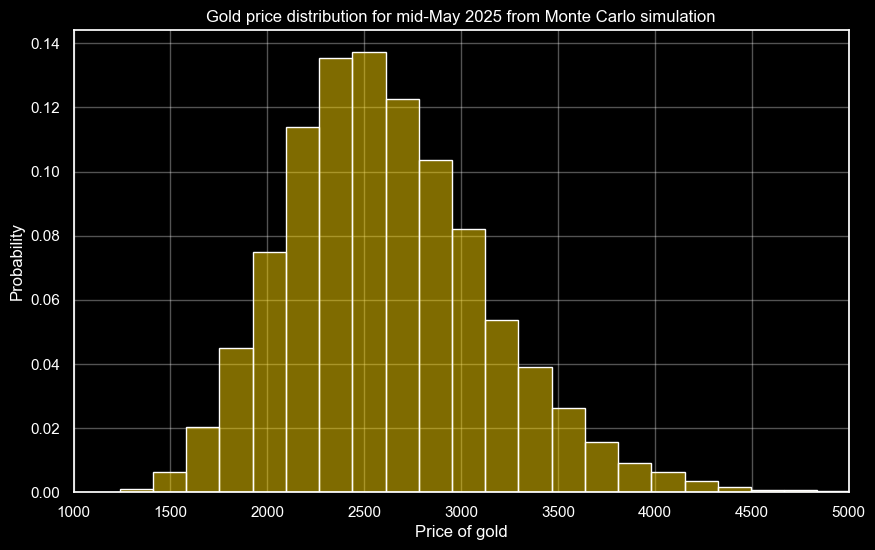

In [8]:
plt.figure(figsize=(10, 6))

sns.histplot(final_prices, bins=25, stat="probability", color="gold", edgecolor="white", alpha=0.5)

# Add limits to x axis, to be able to see better the most likely values 
plt.xlim(1000, 5000)

plt.title("Gold price distribution for mid-May 2025 from Monte Carlo simulation")
plt.xlabel("Price of gold")
plt.ylabel("Probability")

save_chart_as_png("6.1_AU_Monte_Carlo_1Y_hist")

In [9]:
# Get chance of price getting higher than ATH after 1 year
au_max = df_au["price"].max()
final_prices[final_prices > au_max].count() / final_prices.count()

0.6395

In [10]:
# Get chance of price getting higher than 3k after 1 year
final_prices[final_prices > 3000].count() / final_prices.count()

0.2168

In [11]:
# Get chance of price getting lower than 2k after 1 year
final_prices[final_prices < 2000].count() / final_prices.count()

0.1003

**Key takeaways:**
- The probability of gold exceeding its all-time high by mid-May of 2025 is about 64%.
- The likelihood of surpassing \$3,000 by mid-May of 2025 is approximately 22%.
- The chance of falling below \$2,000 by mid-May of 2025 is nearly 10%.

## Ten years forecast

In [12]:
# Get simulation parameters
num_simulations = 10_000
num_days = 2520
# Initialize df and pre-allocate for efficiency
df_mcs = pd.DataFrame(index=range(num_days + 1), columns=range(num_simulations))
# Get last price as starting point
last_price = df_au["price"].iloc[-1]
# Append last price to df
df_mcs.iloc[0, :] = last_price
# Generate random simulations
for simulation in range(num_simulations):
    # Generate random daily returns series
    daily_returns = np.random.normal(price_change_avg, price_change_std, num_days)
    # Get price series from daily returns series
    price_series = last_price * (1 + daily_returns).cumprod()
    # Append price series to df
    df_mcs.iloc[1:, simulation] = price_series

Text(0, 0.5, '')

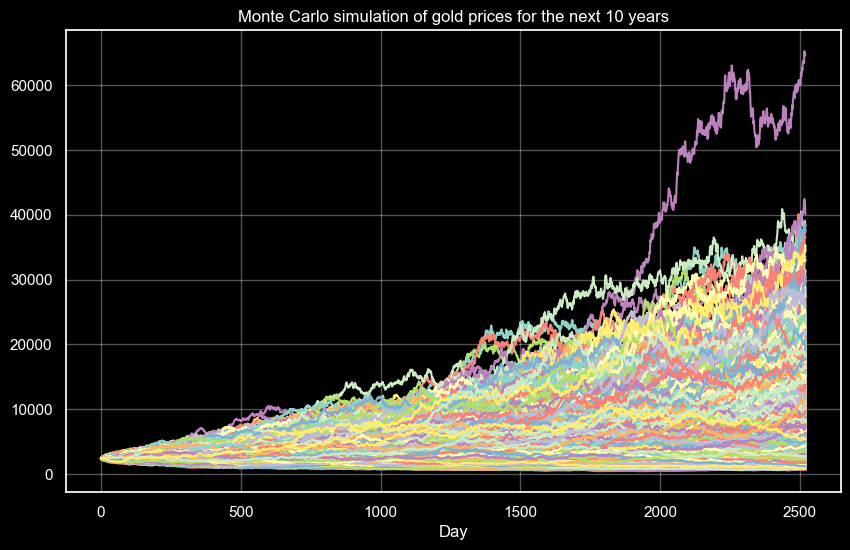

In [13]:
plt.figure(figsize=(10, 6))

plt.plot(df_mcs)

plt.title("Monte Carlo simulation of gold prices for the next 10 years")
plt.xlabel("Day")
plt.ylabel("")

In [14]:
# Get final prices of all the simulations
final_prices = df_mcs.iloc[-1, :]

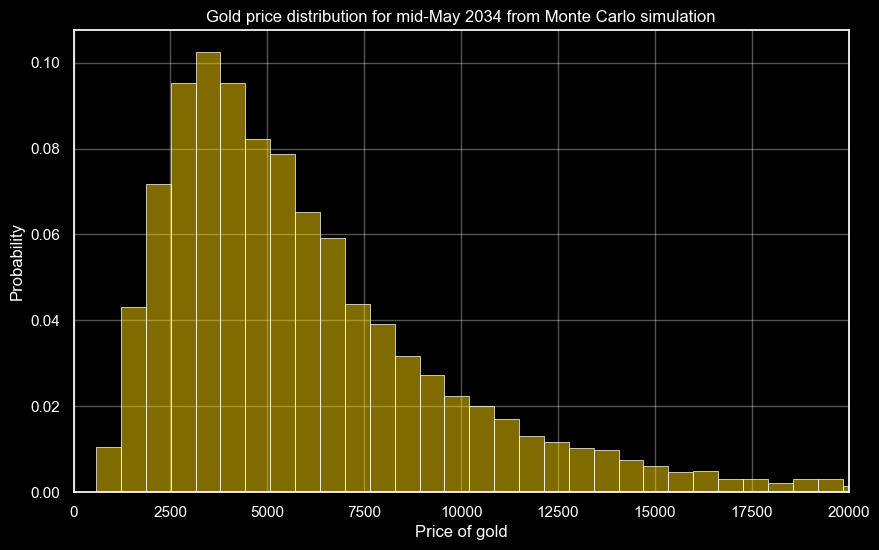

In [15]:
plt.figure(figsize=(10, 6))

sns.histplot(final_prices, bins=100, stat="probability", color="gold", edgecolor="white", alpha=0.5)

# Add limit to x axis, to be able to see better the most likely values 
plt.xlim(0, 20_000)

plt.title("Gold price distribution for mid-May 2034 from Monte Carlo simulation")
plt.xlabel("Price of gold")
plt.ylabel("Probability")

save_chart_as_png("6.1_AU_Monte_Carlo_10Y_hist")

In [16]:
# Get chance of price getting higher than ATH after 10 years
au_max = df_au["price"].max()
final_prices[final_prices > au_max].count() / final_prices.count()

0.8882

In [17]:
# Get chance of price getting higher than 5k after 10 years
final_prices[final_prices > 5000].count() / final_prices.count()

0.5099

In [18]:
# Get chance of price getting lower than 2k after 10 years
final_prices[final_prices < 2000].count() / final_prices.count()

0.0684

**Key takeaways:**
- The probability of gold exceeding its all-time high by mid-May of 2034 is about 89%.
- The likelihood of surpassing \$5,000 by mid-May of 2034 is approximately 51%.
- The chance of falling below \$2,000 by mid-May of 2034 is nearly 7%.